# Job Market Exploratory Data Analysis

This notebook performs an exploratory data analysis on job postings data collected from LinkedIn. The analysis covers data science, data engineering, data analyst, and software engineering positions.

## Dataset Overview
The dataset contains job postings with the following features:
- job_title: The title of the job posting
- company: The name of the company
- job_location: The location of the job
- job_link: The URL link to the job posting
- first_seen: The date when the job posting was first seen
- search_city: The city used as a search keyword
- search_country: The country used as a search keyword
- job_level: The level of the job (entry-level, mid-level, senior-level)
- job_type: The type of job (full-time, part-time, contract)
- job_summary: Description of the jobs
- job_skills: Skills mentioned in the job

## 1. Import Required Libraries

In [30]:
%pip install pandas numpy matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from datetime import datetime

# Set style and ignore warnings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Load and Combine Datasets

In [32]:
# Define file paths
data_files = {
    'data_analyst': '../data/data_analyst_jobs.csv',
    'data_engineer': '../data/data_engineer_jobs.csv',
    'data_scientist': '../data/data_scientist.csv',
    'software_engineer': '../data/software_engineer_jobs.csv'
}

# Load all datasets
datasets = {}
for job_type, file_path in data_files.items():
    try:
        df = pd.read_csv(file_path)
        df['job_category'] = job_type  # Add job category column
        datasets[job_type] = df
        print(f"Loaded {job_type}: {len(df)} records")
    except Exception as e:
        print(f"Error loading {job_type}: {e}")

# Combine all datasets
combined_df = pd.concat(datasets.values(), ignore_index=True)
print(f"\nTotal combined records: {len(combined_df)}")
print(f"Combined dataset shape: {combined_df.shape}")

Loaded data_analyst: 12894 records
Loaded data_engineer: 6025 records
Loaded data_scientist: 4342 records
Loaded software_engineer: 9380 records

Total combined records: 32641
Combined dataset shape: (32641, 12)
Loaded data_scientist: 4342 records
Loaded software_engineer: 9380 records

Total combined records: 32641
Combined dataset shape: (32641, 12)


## 3. Data Overview and Basic Information

In [33]:
# Display basic information about the dataset
print("Dataset Info:")
print("=" * 50)
combined_df.info()

print("\nColumn Names:")
print("=" * 50)
for i, col in enumerate(combined_df.columns, 1):
    print(f"{i:2d}. {col}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641 entries, 0 to 32640
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       32641 non-null  object
 1   company         32641 non-null  object
 2   job_location    32641 non-null  object
 3   job_link        32641 non-null  object
 4   first_seen      32641 non-null  object
 5   search_city     32641 non-null  object
 6   search_country  32641 non-null  object
 7   job level       32641 non-null  object
 8   job_type        32641 non-null  object
 9   job_summary     32230 non-null  object
 10  job_skills      31368 non-null  object
 11  job_category    32641 non-null  object
dtypes: object(12)
memory usage: 3.0+ MB

Column Names:
 1. job_title
 2. company
 3. job_location
 4. job_link
 5. first_seen
 6. search_city
 7. search_country
 8. job level
 9. job_type
10. job_summary
11. job_skills
12. job_category


In [34]:
# Display first few rows
print("First 5 rows of the combined dataset:")
print("=" * 50)
combined_df.head()

First 5 rows of the combined dataset:


,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills,job_category
0,"Data Analyst-SQL, Tableau",Zortech Solutions,"Mountain View, CA",https://www.linkedin.com/jobs/data-analyst-jobs,2023-12-20,Bloomington,United States,Associate,Onsite,NaN,NaN,data_analyst
1,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop...",data_analyst
2,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-sy...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software...",data_analyst
3,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-vat-...,2023-12-20,Bloomington,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a...",data_analyst
4,Senior HRIS Analyst (Timekeeping and Payroll),Nordson Corporation,Greater Bloomington Area,https://www.linkedin.com/jobs/view/senior-hris...,2023-12-20,Bloomington,United States,Mid senior,Remote,Collaboration drives Nordson’s success as a ma...,"Workday HCM, UKG Dimensions, Ceridian Dayforce...",data_analyst


In [35]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 50)
missing_data = combined_df.isnull().sum()
missing_percent = (missing_data / len(combined_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in the dataset!")

Missing Values Analysis:
             Missing Count  Missing Percentage
job_skills            1273            3.900003
job_summary            411            1.259153


In [36]:
# Check actual column names in the dataset
print("Actual column names in combined dataset:")
print("=" * 50)
for i, col in enumerate(combined_df.columns, 1):
    print(f"{i:2d}. '{col}'")

# Check a sample of the data
print("\nSample data:")
print("=" * 50)
combined_df.head(2)

Actual column names in combined dataset:
 1. 'job_title'
 2. 'company'
 3. 'job_location'
 4. 'job_link'
 5. 'first_seen'
 6. 'search_city'
 7. 'search_country'
 8. 'job level'
 9. 'job_type'
10. 'job_summary'
11. 'job_skills'
12. 'job_category'

Sample data:


,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills,job_category
0,"Data Analyst-SQL, Tableau",Zortech Solutions,"Mountain View, CA",https://www.linkedin.com/jobs/data-analyst-jobs,2023-12-20,Bloomington,United States,Associate,Onsite,NaN,NaN,data_analyst
1,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop...",data_analyst


## 4. Data Cleaning and Preprocessing

In [37]:
# Create a copy for cleaning
df_clean = combined_df.copy()

# Standardize column names - replace spaces with underscores
df_clean.columns = df_clean.columns.str.replace(' ', '_')

print("Column names after standardization:")
print("=" * 50)
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i:2d}. '{col}'")

# Convert first_seen to datetime
df_clean['first_seen'] = pd.to_datetime(df_clean['first_seen'], errors='coerce')

# Clean job_level column (standardize naming)
df_clean['job_level'] = df_clean['job_level'].str.strip().str.title()

# Clean job_type column
df_clean['job_type'] = df_clean['job_type'].str.strip().str.title()

# Extract US states from job_location
def extract_state(location):
    if pd.isna(location):
        return None
    # Look for state abbreviations (2 capital letters after comma)
    match = re.search(r',\s*([A-Z]{2})(?:,|$)', location)
    if match:
        return match.group(1)
    return None

df_clean['state'] = df_clean['job_location'].apply(extract_state)

# Extract city from job_location
def extract_city(location):
    if pd.isna(location):
        return None
    # Get the first part before comma
    return location.split(',')[0].strip() if ',' in location else location.strip()

df_clean['city'] = df_clean['job_location'].apply(extract_city)

print(f"\nData cleaning completed!")
print(f"Cleaned dataset shape: {df_clean.shape}")

Column names after standardization:
 1. 'job_title'
 2. 'company'
 3. 'job_location'
 4. 'job_link'
 5. 'first_seen'
 6. 'search_city'
 7. 'search_country'
 8. 'job_level'
 9. 'job_type'
10. 'job_summary'
11. 'job_skills'
12. 'job_category'

Data cleaning completed!
Cleaned dataset shape: (32641, 14)


## 5. Descriptive Statistics

In [38]:
# Basic statistics for categorical variables
print("Job Categories Distribution:")
print("=" * 50)
job_category_counts = df_clean['job_category'].value_counts()
print(job_category_counts)
print(f"\nTotal unique job categories: {df_clean['job_category'].nunique()}")

Job Categories Distribution:
job_category
data_analyst         12894
software_engineer     9380
data_engineer         6025
data_scientist        4342
Name: count, dtype: int64

Total unique job categories: 4


In [39]:
# Job levels distribution
print("Job Levels Distribution:")
print("=" * 50)
job_level_counts = df_clean['job_level'].value_counts()
print(job_level_counts)
print(f"\nTotal unique job levels: {df_clean['job_level'].nunique()}")

Job Levels Distribution:
job_level
Mid Senior    26244
Associate      6397
Name: count, dtype: int64

Total unique job levels: 2


In [40]:
# Job types distribution
print("Job Types Distribution:")
print("=" * 50)
job_type_counts = df_clean['job_type'].value_counts()
print(job_type_counts)
print(f"\nTotal unique job types: {df_clean['job_type'].nunique()}")

Job Types Distribution:
job_type
Onsite    15707
Hybrid    10703
Remote     6231
Name: count, dtype: int64

Total unique job types: 3


In [41]:
# Top companies with most job postings
print("Top 15 Companies by Job Postings:")
print("=" * 50)
top_companies = df_clean['company'].value_counts().head(15)
print(top_companies)
print(f"\nTotal unique companies: {df_clean['company'].nunique()}")

Top 15 Companies by Job Postings:
company
Jobs for Humanity                          805
Recruiting from Scratch                    659
ClearanceJobs                              419
Steneral Consulting                        414
Canonical                                  290
PwC                                        231
Crossover                                  197
Affirm                                     175
Motion Recruitment                         167
Energy Jobline                             162
Agoda                                      158
Get It Recruit - Information Technology    155
Grammarly                                  144
Robert Half                                144
Nigel Frank International                  135
Name: count, dtype: int64

Total unique companies: 9150


In [42]:
# Geographic distribution - Top states
print("Top 15 States by Job Postings:")
print("=" * 50)
top_states = df_clean['state'].value_counts().head(15)
print(top_states)
print(f"\nTotal unique states: {df_clean['state'].nunique()}")

Top 15 States by Job Postings:
state
CA    2901
TX    1520
FL    1394
NY    1138
IL    1128
VA    1094
PA     909
OH     903
MA     861
NJ     737
MI     725
GA     666
NC     660
MD     579
WA     512
Name: count, dtype: int64

Total unique states: 51


## 6. Visualizations

### 6.1 Job Categories Distribution

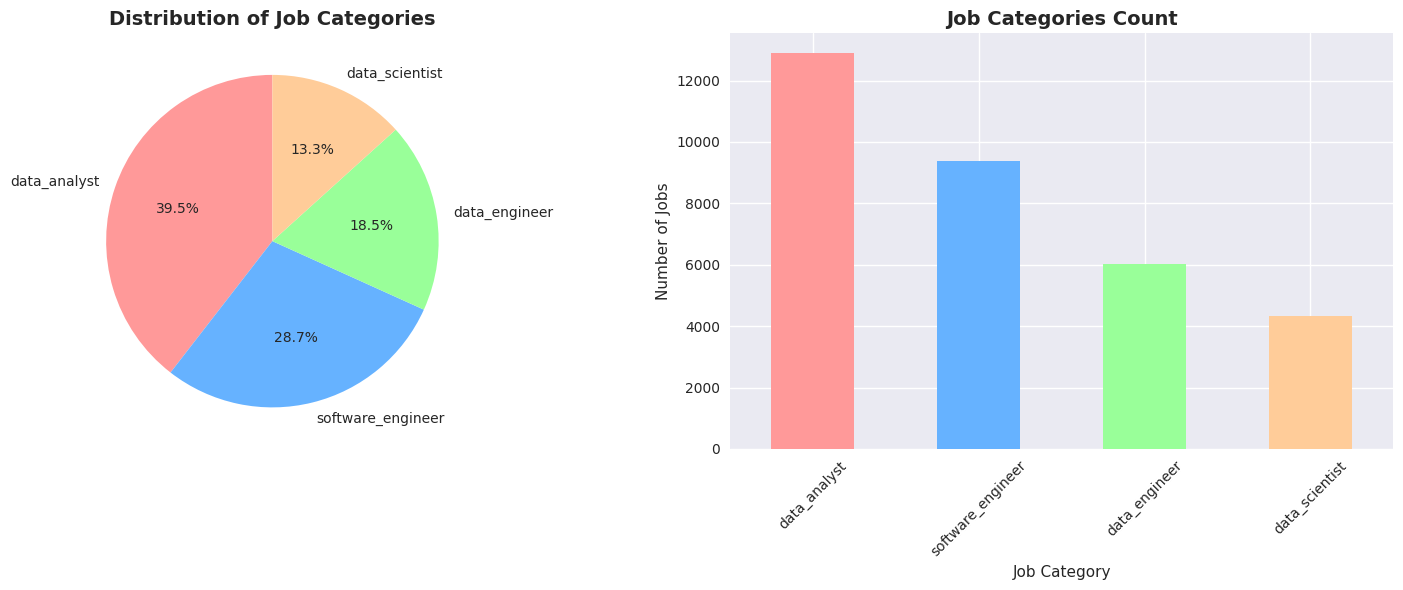

In [43]:
# Job categories pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
wedges, texts, autotexts = ax1.pie(job_category_counts.values, 
                                   labels=job_category_counts.index, 
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90)
ax1.set_title('Distribution of Job Categories', fontsize=14, fontweight='bold')

# Bar chart
job_category_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Job Categories Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('Job Category')
ax2.set_ylabel('Number of Jobs')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 6.2 Job Levels and Types Analysis

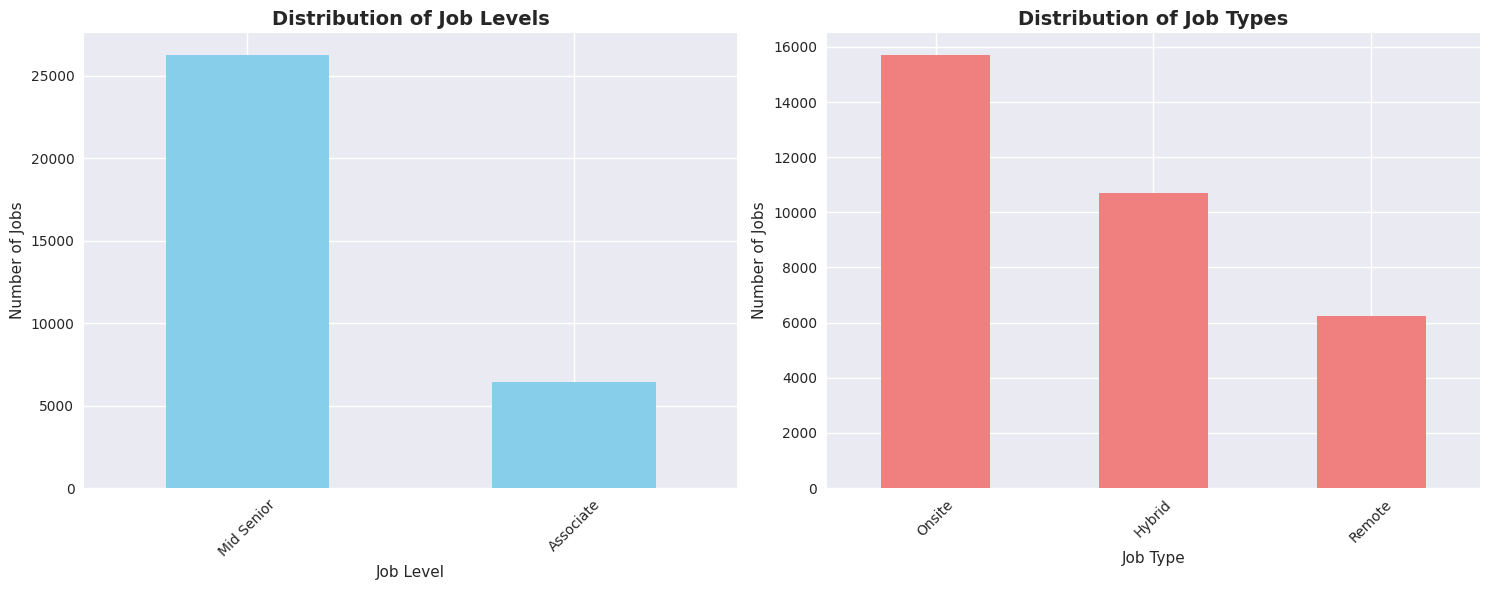

In [44]:
# Job levels and types analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Job levels
job_level_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribution of Job Levels', fontsize=14, fontweight='bold')
ax1.set_xlabel('Job Level')
ax1.set_ylabel('Number of Jobs')
ax1.tick_params(axis='x', rotation=45)

# Job types
job_type_counts.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Distribution of Job Types', fontsize=14, fontweight='bold')
ax2.set_xlabel('Job Type')
ax2.set_ylabel('Number of Jobs')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 6.3 Geographic Distribution

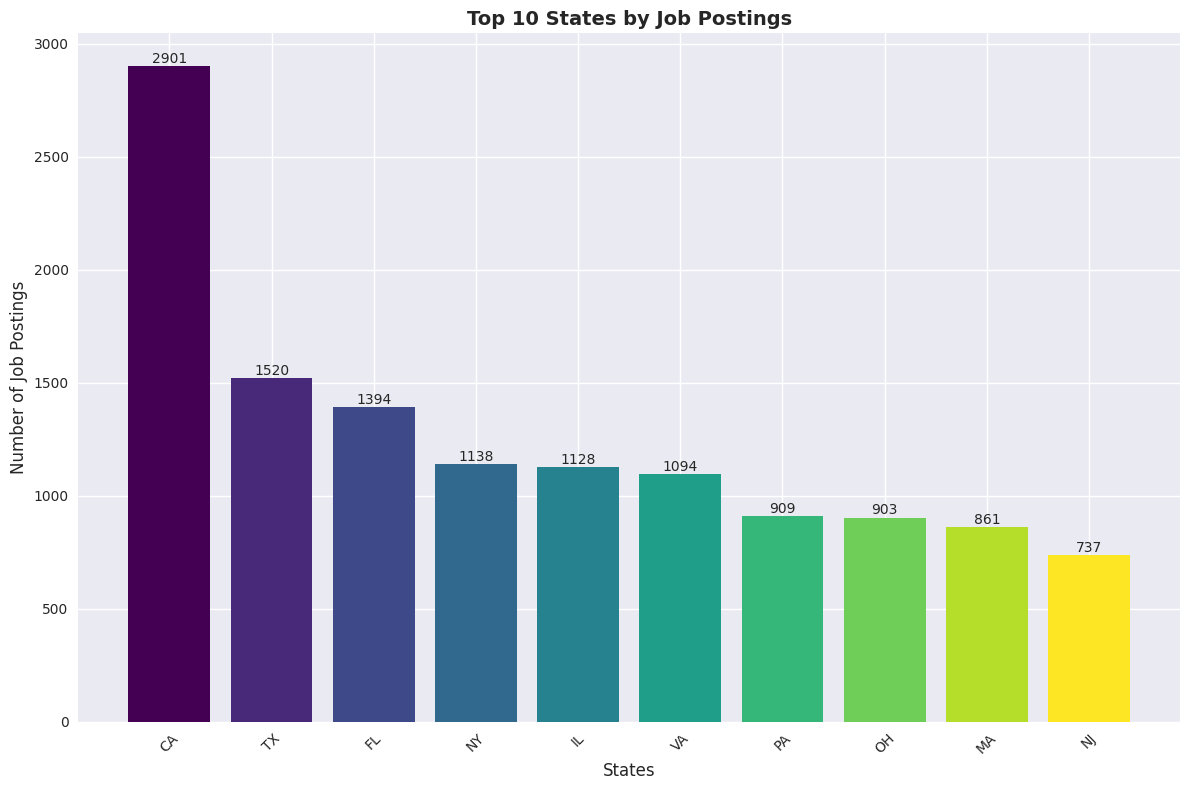

In [45]:
# Top 10 states visualization
plt.figure(figsize=(12, 8))
top_10_states = top_states.head(10)
bars = plt.bar(range(len(top_10_states)), top_10_states.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(top_10_states))))
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.title('Top 10 States by Job Postings', fontsize=14, fontweight='bold')
plt.xticks(range(len(top_10_states)), top_10_states.index, rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 6.4 Top Companies Analysis

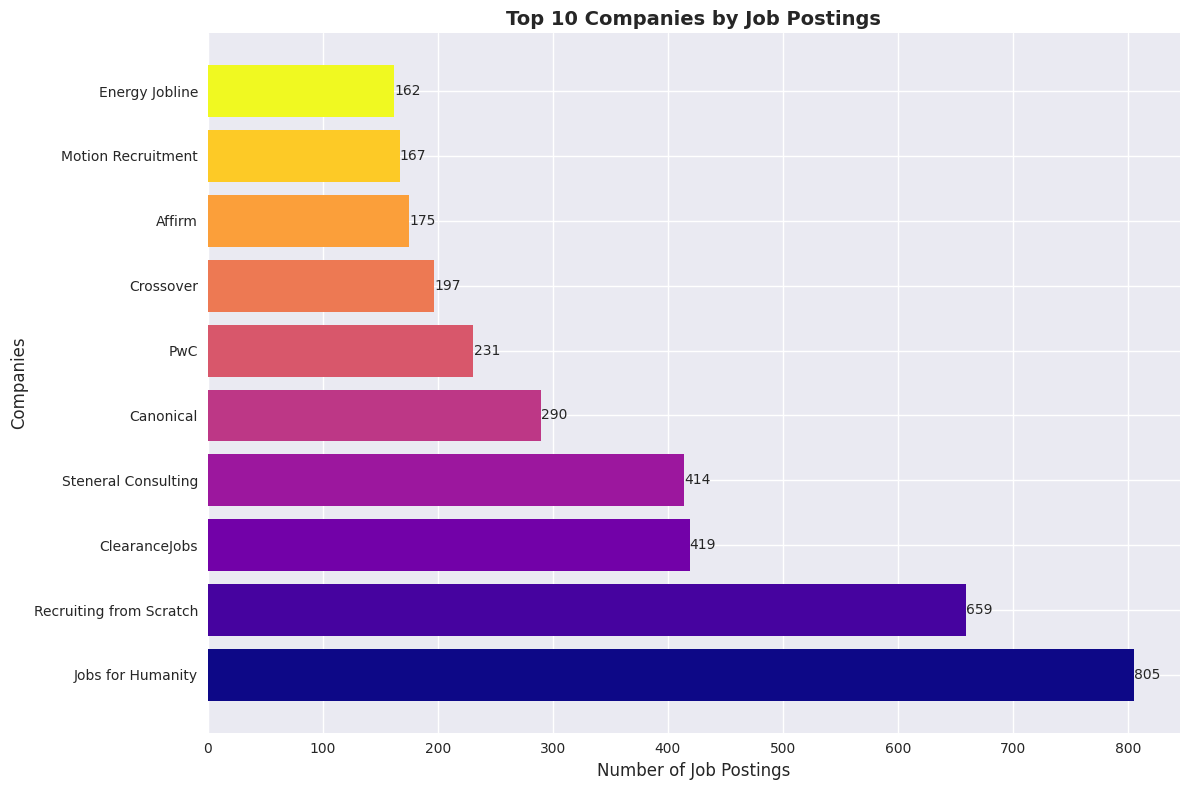

In [46]:
# Top 10 companies visualization
plt.figure(figsize=(12, 8))
top_10_companies = top_companies.head(10)
bars = plt.barh(range(len(top_10_companies)), top_10_companies.values, 
                color=plt.cm.plasma(np.linspace(0, 1, len(top_10_companies))))
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Companies', fontsize=12)
plt.title('Top 10 Companies by Job Postings', fontsize=14, fontweight='bold')
plt.yticks(range(len(top_10_companies)), top_10_companies.index)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

### 6.5 Cross-Analysis: Job Categories vs Job Levels

Cross-tabulation: Job Categories vs Job Levels
job_level          Associate  Mid Senior
job_category                            
data_analyst            3203        9691
data_engineer            949        5076
data_scientist           966        3376
software_engineer       1279        8101


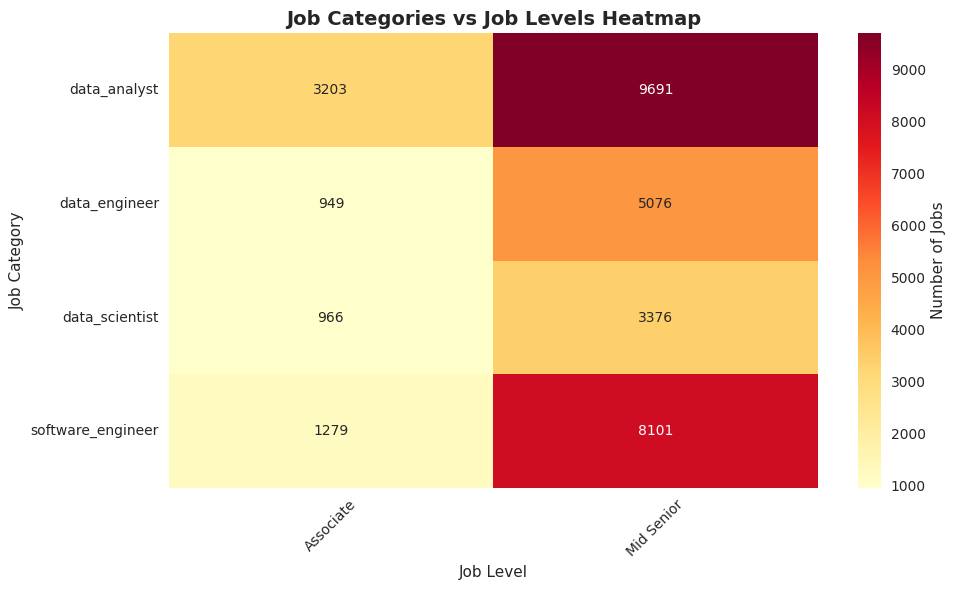

In [47]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_clean['job_category'], df_clean['job_level'])
print("Cross-tabulation: Job Categories vs Job Levels")
print("=" * 60)
print(cross_tab)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Jobs'})
plt.title('Job Categories vs Job Levels Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Job Level')
plt.ylabel('Job Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 6.6 Job Categories vs Job Types

Cross-tabulation: Job Categories vs Job Types
job_type           Hybrid  Onsite  Remote
job_category                             
data_analyst         4339    6670    1885
data_engineer        2061    2817    1147
data_scientist       1558    1904     880
software_engineer    2745    4316    2319


<Figure size 1200x800 with 0 Axes>

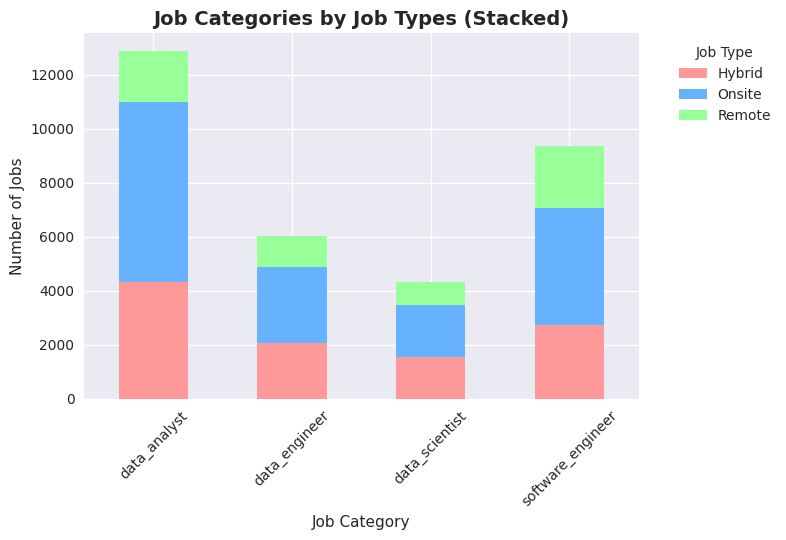

In [48]:
# Cross-tabulation for job categories vs job types
cross_tab_type = pd.crosstab(df_clean['job_category'], df_clean['job_type'])
print("Cross-tabulation: Job Categories vs Job Types")
print("=" * 60)
print(cross_tab_type)

# Stacked bar chart
plt.figure(figsize=(12, 8))
cross_tab_type.plot(kind='bar', stacked=True, 
                   color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])
plt.title('Job Categories by Job Types (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Job Category')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Skills Analysis

In [49]:
# Extract and analyze skills
def extract_skills(skills_text):
    if pd.isna(skills_text) or skills_text == '':
        return []
    # Split by comma and clean
    skills = [skill.strip() for skill in str(skills_text).split(',')]
    return [skill for skill in skills if skill and len(skill) > 1]

# Apply skill extraction
df_clean['skills_list'] = df_clean['job_skills'].apply(extract_skills)

# Get all skills
all_skills = []
for skills_list in df_clean['skills_list']:
    all_skills.extend(skills_list)

# Count skills
skills_counter = Counter(all_skills)
top_20_skills = skills_counter.most_common(20)

print("Top 20 Most Mentioned Skills:")
print("=" * 50)
for i, (skill, count) in enumerate(top_20_skills, 1):
    print(f"{i:2d}. {skill:<25} : {count:3d} mentions")

print(f"\nTotal unique skills mentioned: {len(skills_counter)}")
print(f"Total skill mentions: {sum(skills_counter.values())}")

Top 20 Most Mentioned Skills:
 1. SQL                       : 12013 mentions
 2. Python                    : 11446 mentions
 3. AWS                       : 5142 mentions
 4. Java                      : 4980 mentions
 5. Data Analysis             : 4507 mentions
 6. Communication             : 4159 mentions
 7. Tableau                   : 3905 mentions
 8. Agile                     : 3670 mentions
 9. JavaScript                : 3047 mentions
10. Power BI                  : 2951 mentions
11. Data Visualization        : 2754 mentions
12. Machine Learning          : 2752 mentions
13. Azure                     : 2725 mentions
14. Data analysis             : 2701 mentions
15. Excel                     : 2663 mentions
16. Git                       : 2575 mentions
17. Kubernetes                : 2554 mentions
18. Docker                    : 2443 mentions
19. C#                        : 2262 mentions
20. Project Management        : 2217 mentions

Total unique skills mentioned: 96137
Total skil

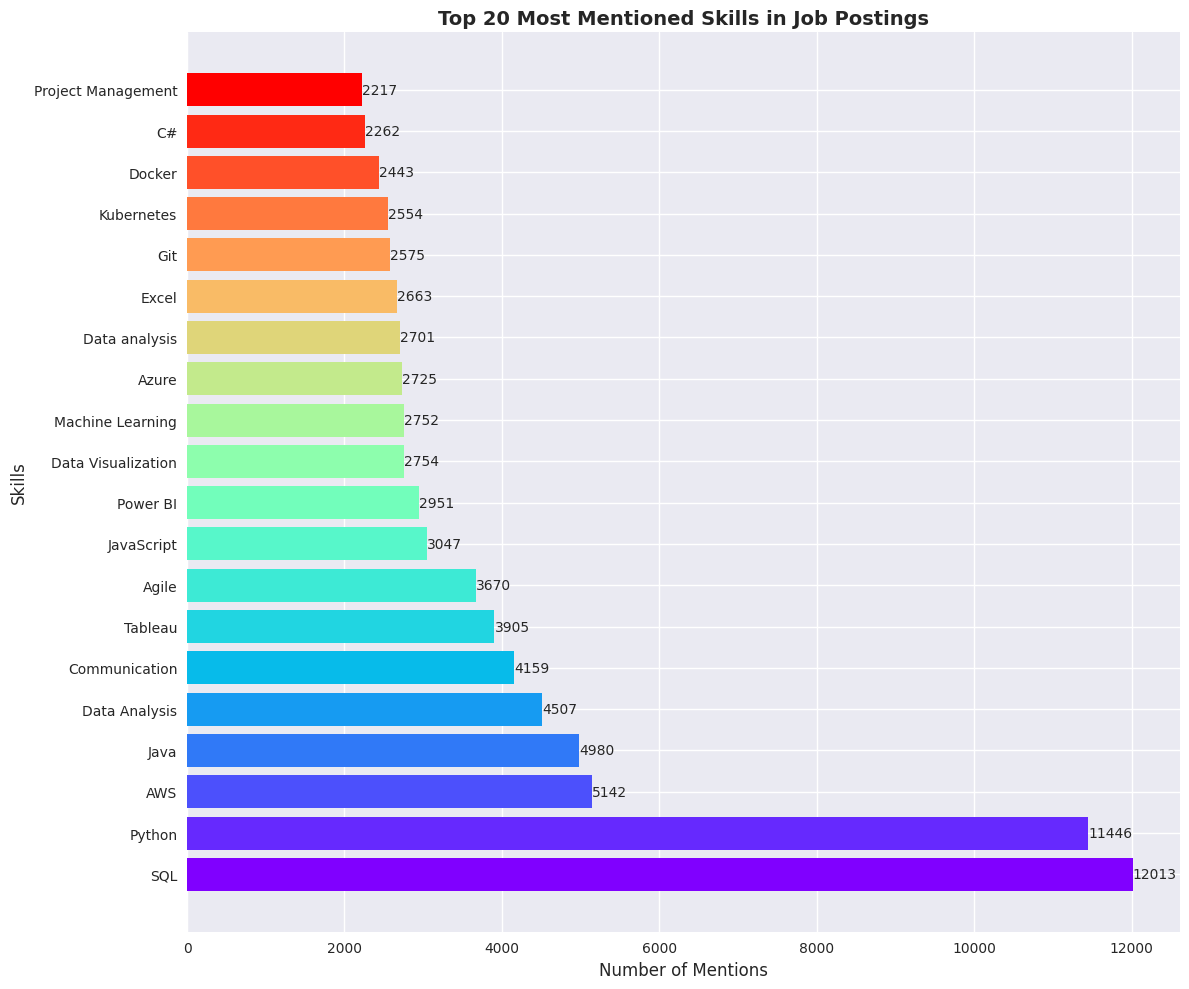

In [50]:
# Visualize top skills
skills_df = pd.DataFrame(top_20_skills, columns=['Skill', 'Count'])

plt.figure(figsize=(12, 10))
bars = plt.barh(range(len(skills_df)), skills_df['Count'], 
                color=plt.cm.rainbow(np.linspace(0, 1, len(skills_df))))
plt.xlabel('Number of Mentions', fontsize=12)
plt.ylabel('Skills', fontsize=12)
plt.title('Top 20 Most Mentioned Skills in Job Postings', fontsize=14, fontweight='bold')
plt.yticks(range(len(skills_df)), skills_df['Skill'])

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

## 8. Time Series Analysis

Job Postings by Date:
Date range: 2023-12-17 to 2023-12-25
Total days with job postings: 3
Average jobs per day: 10880.3
Max jobs in a single day: 17236


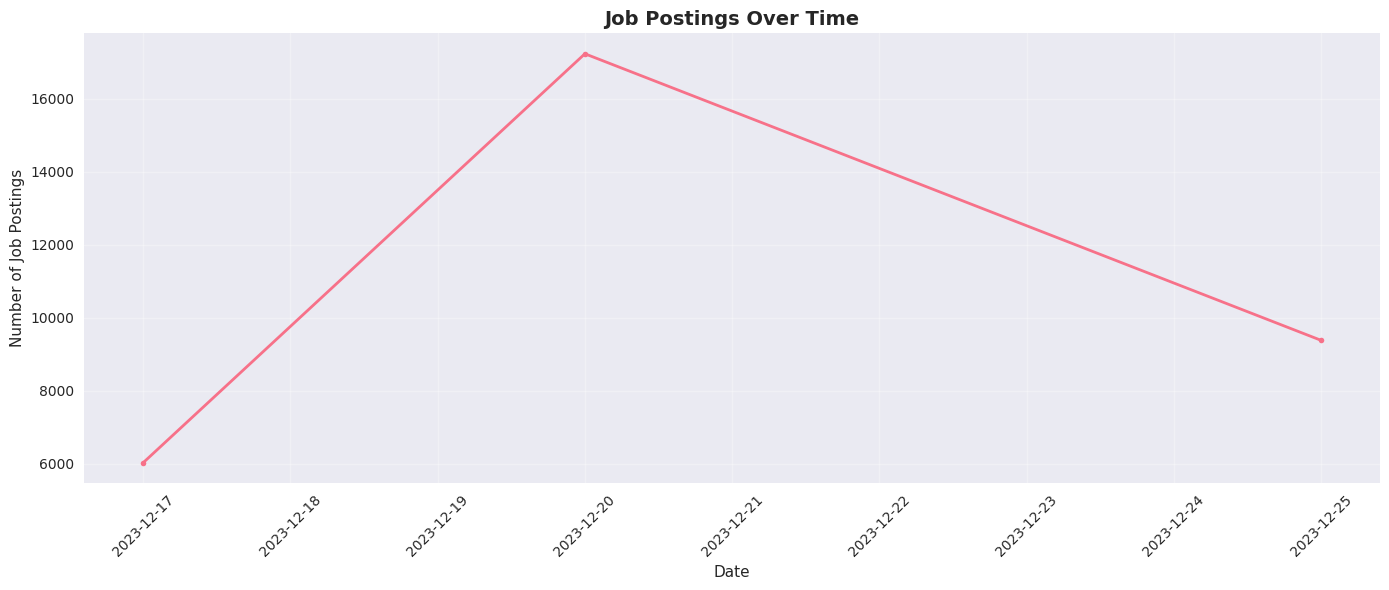

In [51]:
# Time series analysis of job postings
df_time = df_clean[df_clean['first_seen'].notna()].copy()
df_time['date'] = df_time['first_seen'].dt.date
df_time['month_year'] = df_time['first_seen'].dt.to_period('M')

# Daily job postings
daily_jobs = df_time.groupby('date').size().reset_index(name='job_count')
print("Job Postings by Date:")
print("=" * 50)
print(f"Date range: {daily_jobs['date'].min()} to {daily_jobs['date'].max()}")
print(f"Total days with job postings: {len(daily_jobs)}")
print(f"Average jobs per day: {daily_jobs['job_count'].mean():.1f}")
print(f"Max jobs in a single day: {daily_jobs['job_count'].max()}")

# Plot time series
plt.figure(figsize=(14, 6))
plt.plot(pd.to_datetime(daily_jobs['date']), daily_jobs['job_count'], 
         marker='o', linewidth=2, markersize=4)
plt.title('Job Postings Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Advanced Analysis and Insights

In [52]:
# Skills by job category analysis
print("Skills Analysis by Job Category:")
print("=" * 50)

for category in df_clean['job_category'].unique():
    category_df = df_clean[df_clean['job_category'] == category]
    category_skills = []
    
    for skills_list in category_df['skills_list']:
        category_skills.extend(skills_list)
    
    category_skills_counter = Counter(category_skills)
    top_5_skills = category_skills_counter.most_common(5)
    
    print(f"\n{category.upper().replace('_', ' ')} - Top 5 Skills:")
    for i, (skill, count) in enumerate(top_5_skills, 1):
        print(f"  {i}. {skill:<20} : {count} mentions")

Skills Analysis by Job Category:

DATA ANALYST - Top 5 Skills:
  1. SQL                  : 4286 mentions
  2. Data Analysis        : 2828 mentions
  3. Communication        : 2466 mentions
  4. Tableau              : 2153 mentions
  5. Excel                : 2150 mentions

DATA ENGINEER - Top 5 Skills:
  1. SQL                  : 3050 mentions
  2. Python               : 2937 mentions
  3. AWS                  : 1285 mentions
  4. ETL                  : 1099 mentions
  5. Spark                : 1027 mentions

DATA SCIENTIST - Top 5 Skills:
  1. Python               : 2825 mentions
  2. SQL                  : 2414 mentions
  3. Machine Learning     : 1323 mentions
  4. Data Science         : 1093 mentions
  5. AWS                  : 955 mentions

SOFTWARE ENGINEER - Top 5 Skills:
  1. Python               : 3552 mentions
  2. Java                 : 3152 mentions
  3. AWS                  : 2569 mentions
  4. JavaScript           : 2405 mentions
  5. SQL                  : 2263 mentions


Job Summary Statistics:
Average summary length (characters): 3956
Average summary word count: 566
Longest summary: 20763 characters
Shortest summary: 0 characters


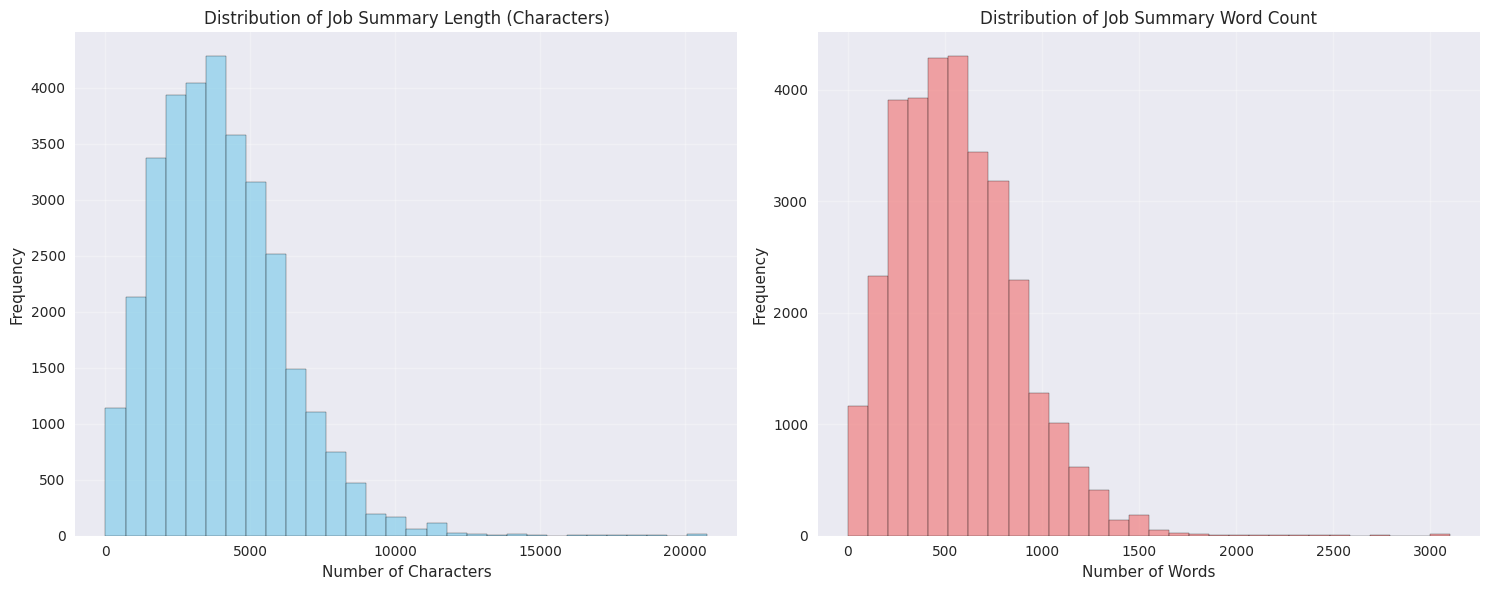

In [53]:
# Job summary length analysis
df_clean['summary_length'] = df_clean['job_summary'].fillna('').str.len()
df_clean['summary_word_count'] = df_clean['job_summary'].fillna('').str.split().str.len()

print("Job Summary Statistics:")
print("=" * 50)
print(f"Average summary length (characters): {df_clean['summary_length'].mean():.0f}")
print(f"Average summary word count: {df_clean['summary_word_count'].mean():.0f}")
print(f"Longest summary: {df_clean['summary_length'].max()} characters")
print(f"Shortest summary: {df_clean['summary_length'].min()} characters")

# Plot summary length distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Character length distribution
ax1.hist(df_clean['summary_length'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
ax1.set_title('Distribution of Job Summary Length (Characters)')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# Word count distribution
ax2.hist(df_clean['summary_word_count'], bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
ax2.set_title('Distribution of Job Summary Word Count')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Key Insights and Summary

In [54]:
# Generate comprehensive summary
print("=" * 70)
print("                    KEY INSIGHTS AND SUMMARY")
print("=" * 70)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total job postings analyzed: {len(df_clean):,}")
print(f"   • Job categories covered: {df_clean['job_category'].nunique()}")
print(f"   • Unique companies: {df_clean['company'].nunique():,}")
print(f"   • Geographic coverage: {df_clean['state'].nunique()} states")
print(f"   • Time period: {df_clean['first_seen'].min().strftime('%Y-%m-%d')} to {df_clean['first_seen'].max().strftime('%Y-%m-%d')}")

print("\n🏢 JOB MARKET COMPOSITION:")
for category, count in job_category_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"   • {category.replace('_', ' ').title():<20}: {count:3d} jobs ({percentage:.1f}%)")

print("\n📈 EXPERIENCE LEVELS:")
for level, count in job_level_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"   • {level:<15}: {count:3d} jobs ({percentage:.1f}%)")

print("\n💼 EMPLOYMENT TYPES:")
for job_type, count in job_type_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"   • {job_type:<15}: {count:3d} jobs ({percentage:.1f}%)")

print("\n🌟 TOP SKILLS IN DEMAND:")
for i, (skill, count) in enumerate(top_20_skills[:10], 1):
    print(f"   {i:2d}. {skill:<20}: {count:3d} mentions")

print("\n🏙️ TOP JOB MARKETS:")
for i, (state, count) in enumerate(top_states.head(5).items(), 1):
    print(f"   {i}. {state:<15}: {count:3d} jobs")

print("\n🏢 TOP HIRING COMPANIES:")
for i, (company, count) in enumerate(top_companies.head(5).items(), 1):
    company_name = company[:30] + '...' if len(company) > 30 else company
    print(f"   {i}. {company_name:<33}: {count:2d} jobs")

print("\n" + "=" * 70)

                    KEY INSIGHTS AND SUMMARY

📊 DATASET OVERVIEW:
   • Total job postings analyzed: 32,641
   • Job categories covered: 4
   • Unique companies: 9,150
   • Geographic coverage: 51 states
   • Time period: 2023-12-17 to 2023-12-25

🏢 JOB MARKET COMPOSITION:
   • Data Analyst        : 12894 jobs (39.5%)
   • Software Engineer   : 9380 jobs (28.7%)
   • Data Engineer       : 6025 jobs (18.5%)
   • Data Scientist      : 4342 jobs (13.3%)

📈 EXPERIENCE LEVELS:
   • Mid Senior     : 26244 jobs (80.4%)
   • Associate      : 6397 jobs (19.6%)

💼 EMPLOYMENT TYPES:
   • Onsite         : 15707 jobs (48.1%)
   • Hybrid         : 10703 jobs (32.8%)
   • Remote         : 6231 jobs (19.1%)

🌟 TOP SKILLS IN DEMAND:
    1. SQL                 : 12013 mentions
    2. Python              : 11446 mentions
    3. AWS                 : 5142 mentions
    4. Java                : 4980 mentions
    5. Data Analysis       : 4507 mentions
    6. Communication       : 4159 mentions
    7. Tableau 

## 11. Export Cleaned Dataset

In [57]:
df_clean.head(5)

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job_level,job_type,job_summary,job_skills,job_category,state,city,skills_list,summary_length,summary_word_count
0,"Data Analyst-SQL, Tableau",Zortech Solutions,"Mountain View, CA",https://www.linkedin.com/jobs/data-analyst-jobs,2023-12-20,Bloomington,United States,Associate,Onsite,NaN,NaN,data_analyst,CA,Mountain View,[],0,0
1,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,2023-12-20,Bloomington,United States,Mid Senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop...",data_analyst,IN,Bloomington,"[Data analysis, Market research, Survey develo...",6303,906
2,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-sy...,2023-12-20,Bloomington,United States,Mid Senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software...",data_analyst,IN,Bloomington,"[Business Analysis, Technical Writing, Softwar...",3718,513
3,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-vat-...,2023-12-20,Bloomington,United States,Mid Senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a...",data_analyst,IN,Bloomington,"[Accounting, Finance, VAT/GST tax regimes, US ...",2702,430
4,Senior HRIS Analyst (Timekeeping and Payroll),Nordson Corporation,Greater Bloomington Area,https://www.linkedin.com/jobs/view/senior-hris...,2023-12-20,Bloomington,United States,Mid Senior,Remote,Collaboration drives Nordson’s success as a ma...,"Workday HCM, UKG Dimensions, Ceridian Dayforce...",data_analyst,None,Greater Bloomington Area,"[Workday HCM, UKG Dimensions, Ceridian Dayforc...",6506,912


In [55]:
# Save the cleaned and combined dataset
output_path = '../data/combined_jobs_dataset.csv'
df_clean.to_csv(output_path, index=False)
print(f"✅ Combined and cleaned dataset saved to: {output_path}")
print(f"📁 Dataset contains {len(df_clean)} rows and {len(df_clean.columns)} columns")

# Show final column names
print("\n📋 Final dataset columns:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"   {i:2d}. {col}")

✅ Combined and cleaned dataset saved to: ../data/combined_jobs_dataset.csv
📁 Dataset contains 32641 rows and 17 columns

📋 Final dataset columns:
    1. job_title
    2. company
    3. job_location
    4. job_link
    5. first_seen
    6. search_city
    7. search_country
    8. job_level
    9. job_type
   10. job_summary
   11. job_skills
   12. job_category
   13. state
   14. city
   15. skills_list
   16. summary_length
   17. summary_word_count
